In [46]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())       

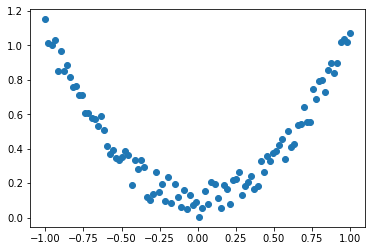

In [47]:
plt.scatter(x.numpy(), y.numpy())

## 搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()

In [54]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_feature, n_hidden, bias=True)
        self.act1 = nn.Sigmoid()
        self.fc2 = nn.Linear(n_hidden, n_output, bias=True)   
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

Net(
  (fc1): Linear(in_features=1, out_features=20, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=20, out_features=1, bias=True)
)


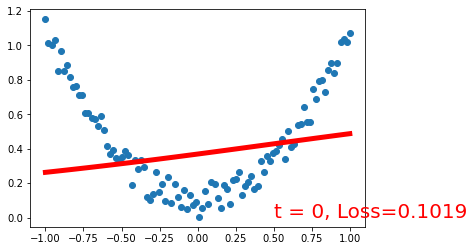

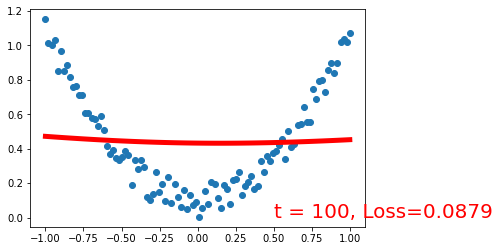

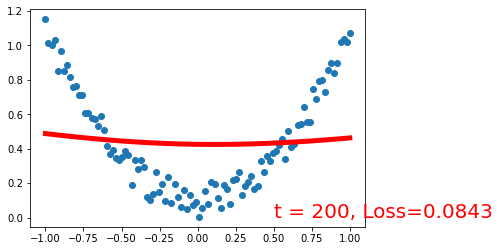

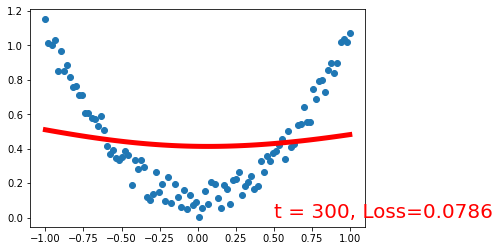

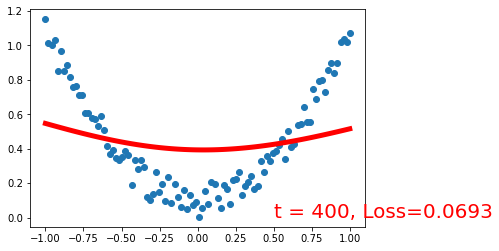

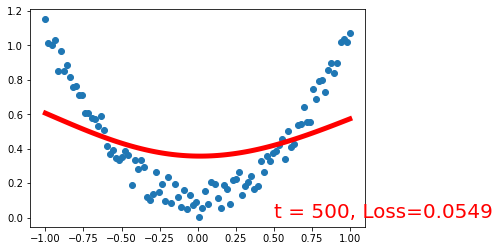

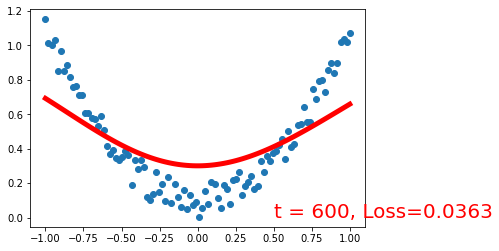

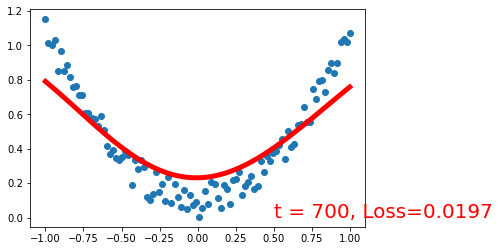

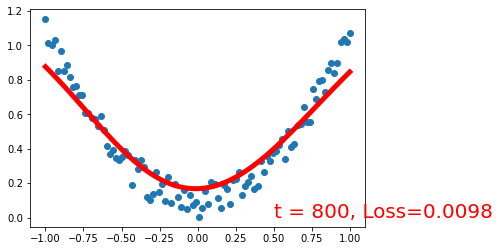

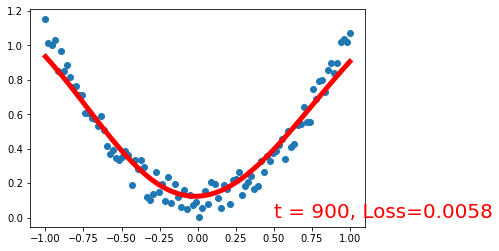

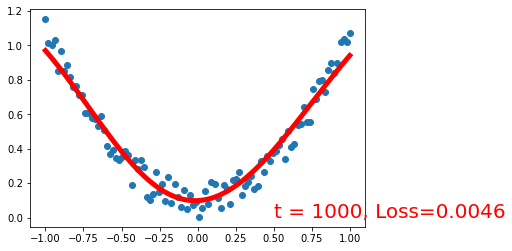

In [55]:
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
plt.ion()   # something about plotting

for t in range(1001):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t %100 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()

In [24]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())
w1 = torch.randn((1, 20), requires_grad=True)
b1 = torch.randn((100,20), requires_grad=True)
w2 = torch.randn((20,1), requires_grad=True)
b2 = torch.randn((100,1), requires_grad=True)

h = x.mm(w1) + b1 #(100, 20)
h_sigmoid = nn.Sigmoid()(h) #(100, 20)
y_pre = h_sigmoid.mm(w2) + b2 #(100, 1)
f = (y-y_pre).pow(2).sum()

f.backward()

w2_grad = -2 * h_sigmoid.T.mm(y - y_pre)

b2_grad = -2 * (y - y_pre)

w1_grad = x.T.mm(-2 * (y - y_pre).mm(w2.T) * h_sigmoid * (1 - h_sigmoid))

b1_grad = -2 * (y - y_pre).mm(w2.T) * h_sigmoid * (1 - h_sigmoid)

print((w2_grad != w2.grad).int().sum())
print((b2_grad != b2.grad).int().sum())
print((w1_grad != w1.grad).int())
print((b1_grad != b1.grad).int().sum())

print(w1_grad, w1.grad)



tensor(0)
tensor(0)
tensor(10)
tensor(735)
tensor([[  6.9236,   0.9426, -16.2410,   3.9881, -12.4857,  21.6397, -16.4764,
           7.9230,   4.4809,  11.0620,  -7.2993,  -9.1850,  19.9413, -11.3944,
           1.7354,  -0.6247,   4.7440,   0.5184,  -3.2657,  -4.3825]],
       grad_fn=<MmBackward>) tensor([[  6.9236,   0.9426, -16.2410,   3.9881, -12.4857,  21.6397, -16.4764,
           7.9230,   4.4809,  11.0620,  -7.2993,  -9.1850,  19.9413, -11.3944,
           1.7354,  -0.6247,   4.7440,   0.5184,  -3.2657,  -4.3825]])
